In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data_df = pd.read_csv('Compare_list.csv')
data_df.head()

,RowID,Structure,Nitrosoimine,Nitrosated_hetSub_amine,N_in_aromatic_ring,Acyclic,piperidine,N4_sub_piperazine,N4_unsub_piperazine,morpholine,...,Nitrosohydroxylamine,Nitroso_sulphonamide,pKaH of parent amine,activated feature,deactivated feature,overall potency category,Average Mass,CAS (Unique concatenate),CAS (Count),calculate_score
0,Row0,[H][C@@]13N(C[C@@]3([H])CN(C1)c2cnc(Cl)c(Cl)c2...,0,0,0,0,0,0,0,0,...,0,0,6.653855,0,1,potency-reducing feature,273.118859,NaN,0,3
1,Row1,[H][C@]1(CN[C@]1([H])C=O)CN(N=O)c2cnc(Cl)c(Cl)c2,0,0,0,1,0,0,0,0,...,0,0,-0.813607,0,1,potency-reducing feature,289.118264,NaN,0,4
2,Row2,[H][C@@]1(NC[C@@]1([H])C=O)CN(N=O)c2cnc(Cl)c(C...,0,0,0,1,0,0,0,0,...,0,0,-1.448466,0,1,potency-reducing feature,289.118264,NaN,0,4
3,Row3,FC(F)(F)CSCC1NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc...,0,0,0,0,0,0,0,0,...,0,0,-5.064905,0,1,potency-reducing feature,454.853112,96782-87-5 [SUPERSEDED],1,NaN
4,Row4,N(CC#C)(Cc1ccccc1)N=O,0,0,0,1,0,0,0,0,...,0,0,6.511025,1,0,potent feature,174.199578,555-57-7,1,1


In [4]:
data_df = data_df[data_df['calculate_score'] != 'fail']
score_list = data_df['calculate_score'].values

In [5]:
len(data_df)

6385

In [6]:
category_list = []
for i in score_list:
    if not i:
        category_list.append('Potency Category_5')
    elif np.isnan(float(i)):
        category_list.append('Potency Category_5')
    elif int(i) >= 4:
        category_list.append('Potency Category_4')
    elif int(i) == 3:
        category_list.append('Potency Category_3')
    elif int(i) == 2:
        category_list.append('Potency Category_2')
    elif int(i) <= 1:
        category_list.append('Potency Category_1')

In [7]:
len(category_list)

6385

In [8]:
data_df['potency_category'] = category_list

<AxesSubplot:xlabel='pKaH of parent amine', ylabel='Density'>

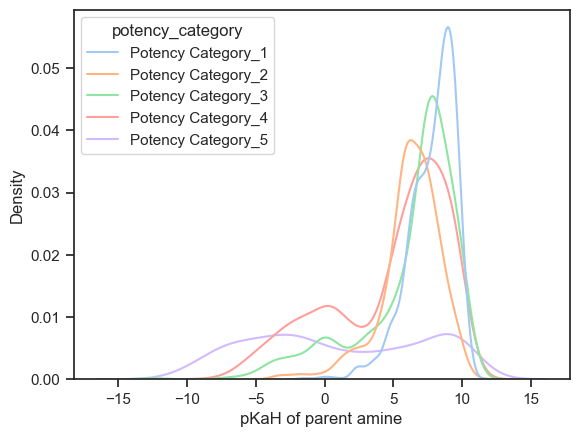

In [9]:
sns.kdeplot(data=data_df, x='pKaH of parent amine', hue='potency_category',
hue_order=['Potency Category_1', 'Potency Category_2', 'Potency Category_3',
'Potency Category_4','Potency Category_5'])

[Text(0, 0, 'Potency Category_1'),
 Text(1, 0, 'Potency Category_2'),
 Text(2, 0, 'Potency Category_3'),
 Text(3, 0, 'Potency Category_4'),
 Text(4, 0, 'Potency Category_5')]

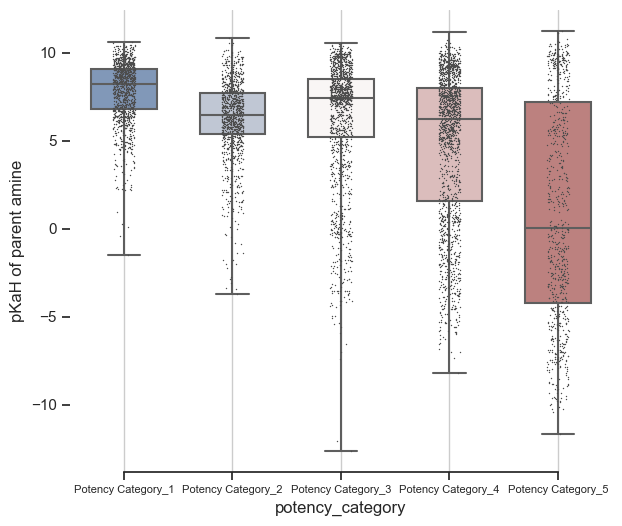

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")

# # Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x='potency_category', y='pKaH of parent amine', data=data_df,
            whis=[0, 100], width=.6, palette="vlag",order=['Potency Category_1', 'Potency Category_2', 'Potency Category_3',
'Potency Category_4','Potency Category_5'])

# Add in points to show each observation
sns.stripplot(x='potency_category', y='pKaH of parent amine', data=data_df,
              size=1, color=".3", linewidth=0,order=['Potency Category_1', 'Potency Category_2', 'Potency Category_3',
'Potency Category_4','Potency Category_5'])

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="pKaH of parent amine")
sns.despine(trim=True, left=True)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)